In [1]:
from keras import models

Using TensorFlow backend.


In [2]:
from keras import layers

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words=10000)

## 내부의 리스트를 차원 데이터로 변형하기

In [5]:
import numpy as np

In [6]:
def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

In [7]:
X_train = vectorize_sequences(train_data)

In [8]:
X_test = vectorize_sequences(test_data)

# 1. 모델과 레이어 지정하기

## 모델을 정의 

In [9]:
model = models.Sequential()

In [10]:
model

## 레이어 정의

In [11]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

In [12]:
model.add(layers.Dense(16, activation='relu'))

In [13]:
model.add(layers.Dense(1, activation='sigmoid'))

# 2. 모델 컴파일을 통해 백엔드 프레임워크와 일치하기

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

##  손실함수, 최적화 함수, 정확도 함수를 직접 지정하기

In [15]:
from keras import optimizers

In [16]:
from keras import losses

In [17]:
from keras import metrics

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss= losses.binary_crossentropy, metrics = [metrics.binary_accuracy ])

In [19]:
history = model.fit(X_train, train_labels, epochs=20, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 82us/step - loss: 0.4824 - binary_accuracy: 0.8029 - val_loss: 0.3457 - val_binary_accuracy: 0.8794
Epoch 2/20
20000/20000 [==============================] - 1s 72us/step - loss: 0.2768 - binary_accuracy: 0.9058 - val_loss: 0.2860 - val_binary_accuracy: 0.8882
Epoch 3/20
20000/20000 [==============================] - 1s 72us/step - loss: 0.2067 - binary_accuracy: 0.9295 - val_loss: 0.3230 - val_binary_accuracy: 0.8708
Epoch 4/20
20000/20000 [==============================] - 1s 71us/step - loss: 0.1686 - binary_accuracy: 0.9409 - val_loss: 0.2736 - val_binary_accuracy: 0.8926
Epoch 5/20
20000/20000 [==============================] - 1s 72us/step - loss: 0.1426 - binary_accuracy: 0.9499 - val_loss: 0.3070 - val_binary_accuracy: 0.8856
Epoch 6/20
20000/20000 [==============================] - 1s 71us/step - loss: 0.1215 - binary_accuracy: 0.9584 - val_loss: 0.3238 - val_binary_ac

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(loss) + 1)

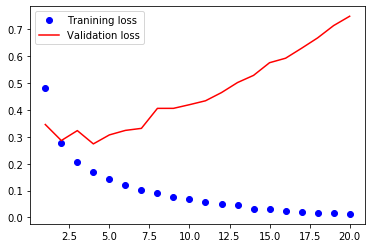

In [22]:
plt.plot(epochs, loss, 'bo', label='Tranining loss ')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()

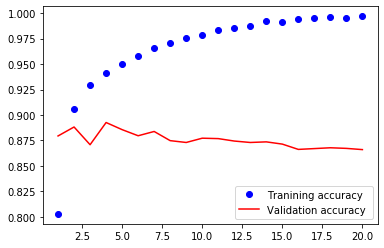

In [23]:
plt.plot(epochs, acc, 'bo', label='Tranining accuracy ')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy ')
plt.legend()

In [24]:
history = model.fit(X_train, train_labels, epochs=4, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 1s 72us/step - loss: 0.0103 - binary_accuracy: 0.9977 - val_loss: 0.7894 - val_binary_accuracy: 0.8638
Epoch 2/4
20000/20000 [==============================] - 1s 72us/step - loss: 0.0063 - binary_accuracy: 0.9991 - val_loss: 0.8269 - val_binary_accuracy: 0.8638
Epoch 3/4
20000/20000 [==============================] - 1s 72us/step - loss: 0.0078 - binary_accuracy: 0.9985 - val_loss: 0.8860 - val_binary_accuracy: 0.8598
Epoch 4/4
20000/20000 [==============================] - 1s 71us/step - loss: 0.0071 - binary_accuracy: 0.9983 - val_loss: 0.8966 - val_binary_accuracy: 0.8622


In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
epochs = range(1, len(loss) + 1)

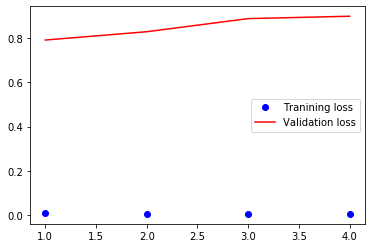

In [26]:
plt.plot(epochs, loss, 'bo', label='Tranining loss ')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()

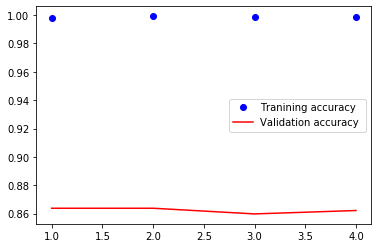

In [27]:
plt.plot(epochs, acc, 'bo', label='Tranining accuracy ')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy ')
plt.legend()

In [28]:
model.predict(X_test)

array([[9.8274052e-03],
       [1.0000000e+00],
       [9.9057698e-01],
       ...,
       [3.6988527e-02],
       [7.5072050e-04],
       [1.2239397e-02]], dtype=float32)